# **Problem Statement : Employee Attrition**

Employee attrition is a critical issue faced by organizations across various industries. High attrition rates can lead to significant challenges, including increased recruitment and training costs, loss of experienced and skilled employees, decreased productivity, and a potential decline in employee morale and customer satisfaction. Understanding the causes and developing strategies to mitigate high attrition rates is essential for maintaining a stable and effective workforce.

We will see step by step procedure for the project including, data cleaning, EDA, Visualization, Survival Analysis and Prediction using various models.

# **Let us import the various libraries to build the models**

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hr-attrition-dataset/Final dataset Attrition.csv


# **Loading Dataset**

In [3]:
attrition = pd.read_csv('/kaggle/input/hr-attrition-dataset/Final dataset Attrition.csv')
attrition

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,No,Travel_Rarely,Sales,3,Male,2,4,Manager,1,...,05-06-1987,NaN,Salary,OFFICE,3,2,No,Job Portal,Part Time,NaN
1466,55,No,Travel_Rarely,Research & Development,1,Male,3,5,Manager,1,...,20-01-1985,NaN,Work Accident,WFH,1,1,No,Walk-in,FullTime,NaN
1467,55,No,Travel_Rarely,Sales,26,Male,2,5,Manager,4,...,17-02-1985,NaN,Work Accident,OFFICE,2,1,No,Recruiter,Part Time,NaN
1468,58,No,Travel_Rarely,Sales,10,Male,3,4,Sales Executive,3,...,29-06-1984,NaN,Work Environment,WFH,2,2,Yes,Job Event,Part Time,NaN


# Data overview

In [4]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education',
       'Date_of_Hire', 'Date_of_termination', 'Status_of_leaving',
       'Mode_of_work', 'Leaves', 'Absenteeism', 'Work_accident',
       'Source_of_Hire', 'Job_mode', 'Unnamed: 32'],
      dtype='object')

**The dataset has the following features and the description are as follows**

The dataset gathered has 1,470 nos of observations and the following 32 nos of features

* "Age" = The age of the employee

* "Attrition" = Whether the employee has attrited or not

* "BusinessTravel" = Whether the employee used to travel for business or not

* "Department" = Which department the employee was employed under

* "DistanceFromHome" = The distance the employee travels to reach for job on a day to day basis

* "Gender" = Gender of the employee

* "JobInvolvement" = The involvement rating of an employee over the job handled

* "JobLevel" = Level at which the employee is working
 
* "JobRole" = The roles and resposibilites of the employee

* "JobSatisfaction" = Satisfaction rating of the employee for the job

* "MaritalStatus" = Marital status of the employee

* "MonthlyIncome" = Monthly income of the employees

* "NumCompaniesWorked" = Number of companies the employees has worked for

* "OverTime" = Whether working Overtime or not
 
* "PercentSalaryHike" = Percentage salary hike since their appointment in the company

* "PerformanceRating" = Performance rating

* "StockOptionLevel" = Level of opted for sharing the stock

* "TotalWorkingYears" = Total years worked by the employees

* "TrainingTimesLastYear" = How many trainings the employee has undergone

* "YearsAtCompany" = Years spent at the present organisation

* "YearsSinceLastPromotion" = Time gone in years since last promotion

* "YearsWithCurrManager" = Years working under he current manager

* "Higher_Education" = Higher education level of the employee

* "Date_of_Hire" = Date of hire of the employee in the current organisation

* "Date_of_termination" = Date of termination from the organisation

* "Status_of_leaving" = Reason for leaving the organisation

* "Mode_of_work" = WFH or WFO

* "Leaves" = Total permitted leaves taken by the employee

* "Absenteeism" = Total days absent for the employee

* "Work_accident" = Work accident if any

* "Source_of_hire" = Source of hire

* "Job_Mode" = Working full time/ part or contractual

In [5]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Higher_Education            object
Date_of_Hire                object
Date_of_termination        float64
Status_of_leaving           object
Mode_of_work                object
Leaves                       int64
Absenteeism         

In [6]:
attrition.shape

(1470, 33)

In [7]:
attrition.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism,Unnamed: 32
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,0.0,1470.000000,1470.000000,0.0
mean,36.923810,9.192517,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,NaN,2.568707,1.525170,NaN
std,9.135373,8.106864,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,NaN,1.716171,1.097856,NaN
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,NaN,1.000000,1.000000,NaN
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,NaN,3.000000,2.000000,NaN
75%,43.000000,14.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,NaN,4.000000,2.000000,NaN
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,NaN,5.000000,3.000000,NaN


# Exploratory Data Analysis

In [8]:
attrition.drop(["Date_of_Hire","Unnamed: 32","Date_of_termination"],axis=1,inplace=True)

In [9]:
attr_dummies = attrition.select_dtypes(include="object")
attr_dummies

,Attrition,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime,Higher_Education,Status_of_leaving,Mode_of_work,Work_accident,Source_of_Hire,Job_mode
0,Yes,Travel_Rarely,Research & Development,Male,Laboratory Technician,Single,Yes,Graduation,Salary,OFFICE,No,Job Event,Contract
1,No,Travel_Rarely,Research & Development,Male,Research Scientist,Single,No,Graduation,Work Accident,WFH,No,Recruiter,Part Time
2,No,Travel_Rarely,Research & Development,Male,Research Director,Married,Yes,Post-Graduation,Dept.Head,WFH,No,Job Event,Contract
3,No,Travel_Rarely,Sales,Male,Sales Representative,Divorced,No,PHD,Work Accident,OFFICE,Yes,Recruiter,FullTime
4,No,Travel_Rarely,Research & Development,Female,Laboratory Technician,Single,No,PHD,Better Opportunity,WFH,No,Job Event,Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Rarely,Sales,Male,Manager,Married,No,Post-Graduation,Salary,OFFICE,No,Job Portal,Part Time
1466,No,Travel_Rarely,Research & Development,Male,Manager,Single,Yes,Post-Graduation,Work Accident,WFH,No,Walk-in,FullTime
1467,No,Travel_Rarely,Sales,Male,Manager,Married,No,Post-Graduation,Work Accident,OFFICE,No,Recruiter,Part Time
1468,No,Travel_Rarely,Sales,Male,Sales Executive,Single,No,PHD,Work Environment,WFH,Yes,Job Event,Part Time


**Target Variable**

In [10]:
#  Target Variable:As it is categorical variable.
attrition["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
# Normalize can be set to True to print proportions instead of number
attrition["Attrition"].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Atttrition')

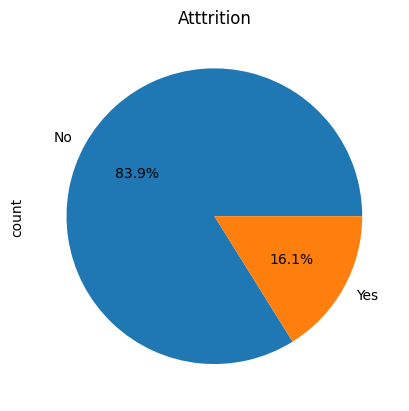

In [12]:
atr=attrition["Attrition"].value_counts()
atr.plot.pie(autopct = "%1.1f%%")
plt.title("Atttrition")

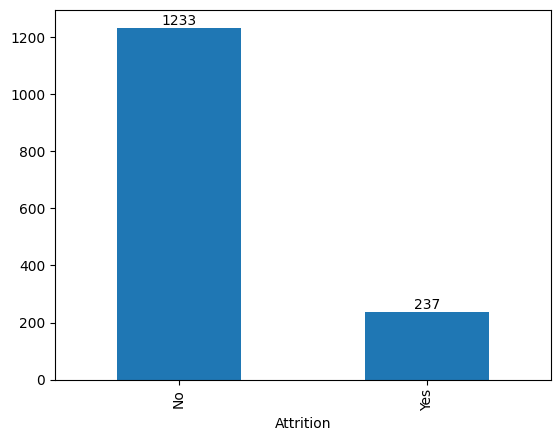

In [13]:
ax=attrition["Attrition"].value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i,)

The attrition of 237 around 16.1%) people out of 1470 People.

Categorical Features: These features have categories(Attrition,BusinessTravel,Department,JobRole,OverTime,Status_of_leaving,Mode_of_work,Job_mode)

Ordinal Features: Variable in category features having some order involved(Gender,MaritalStatus,Source_of_Hire)

Numerical Features: These features have numerical values(Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism)

# **Independent Variable(Categorical)**

In [14]:
#  Finding categorical data in whole dataset use this method.
categorical=attrition.select_dtypes(include="object")
categorical

,Attrition,BusinessTravel,Department,Gender,JobRole,MaritalStatus,OverTime,Higher_Education,Status_of_leaving,Mode_of_work,Work_accident,Source_of_Hire,Job_mode
0,Yes,Travel_Rarely,Research & Development,Male,Laboratory Technician,Single,Yes,Graduation,Salary,OFFICE,No,Job Event,Contract
1,No,Travel_Rarely,Research & Development,Male,Research Scientist,Single,No,Graduation,Work Accident,WFH,No,Recruiter,Part Time
2,No,Travel_Rarely,Research & Development,Male,Research Director,Married,Yes,Post-Graduation,Dept.Head,WFH,No,Job Event,Contract
3,No,Travel_Rarely,Sales,Male,Sales Representative,Divorced,No,PHD,Work Accident,OFFICE,Yes,Recruiter,FullTime
4,No,Travel_Rarely,Research & Development,Female,Laboratory Technician,Single,No,PHD,Better Opportunity,WFH,No,Job Event,Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Rarely,Sales,Male,Manager,Married,No,Post-Graduation,Salary,OFFICE,No,Job Portal,Part Time
1466,No,Travel_Rarely,Research & Development,Male,Manager,Single,Yes,Post-Graduation,Work Accident,WFH,No,Walk-in,FullTime
1467,No,Travel_Rarely,Sales,Male,Manager,Married,No,Post-Graduation,Work Accident,OFFICE,No,Recruiter,Part Time
1468,No,Travel_Rarely,Sales,Male,Sales Executive,Single,No,PHD,Work Environment,WFH,Yes,Job Event,Part Time


In [15]:
attrition["Department"].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

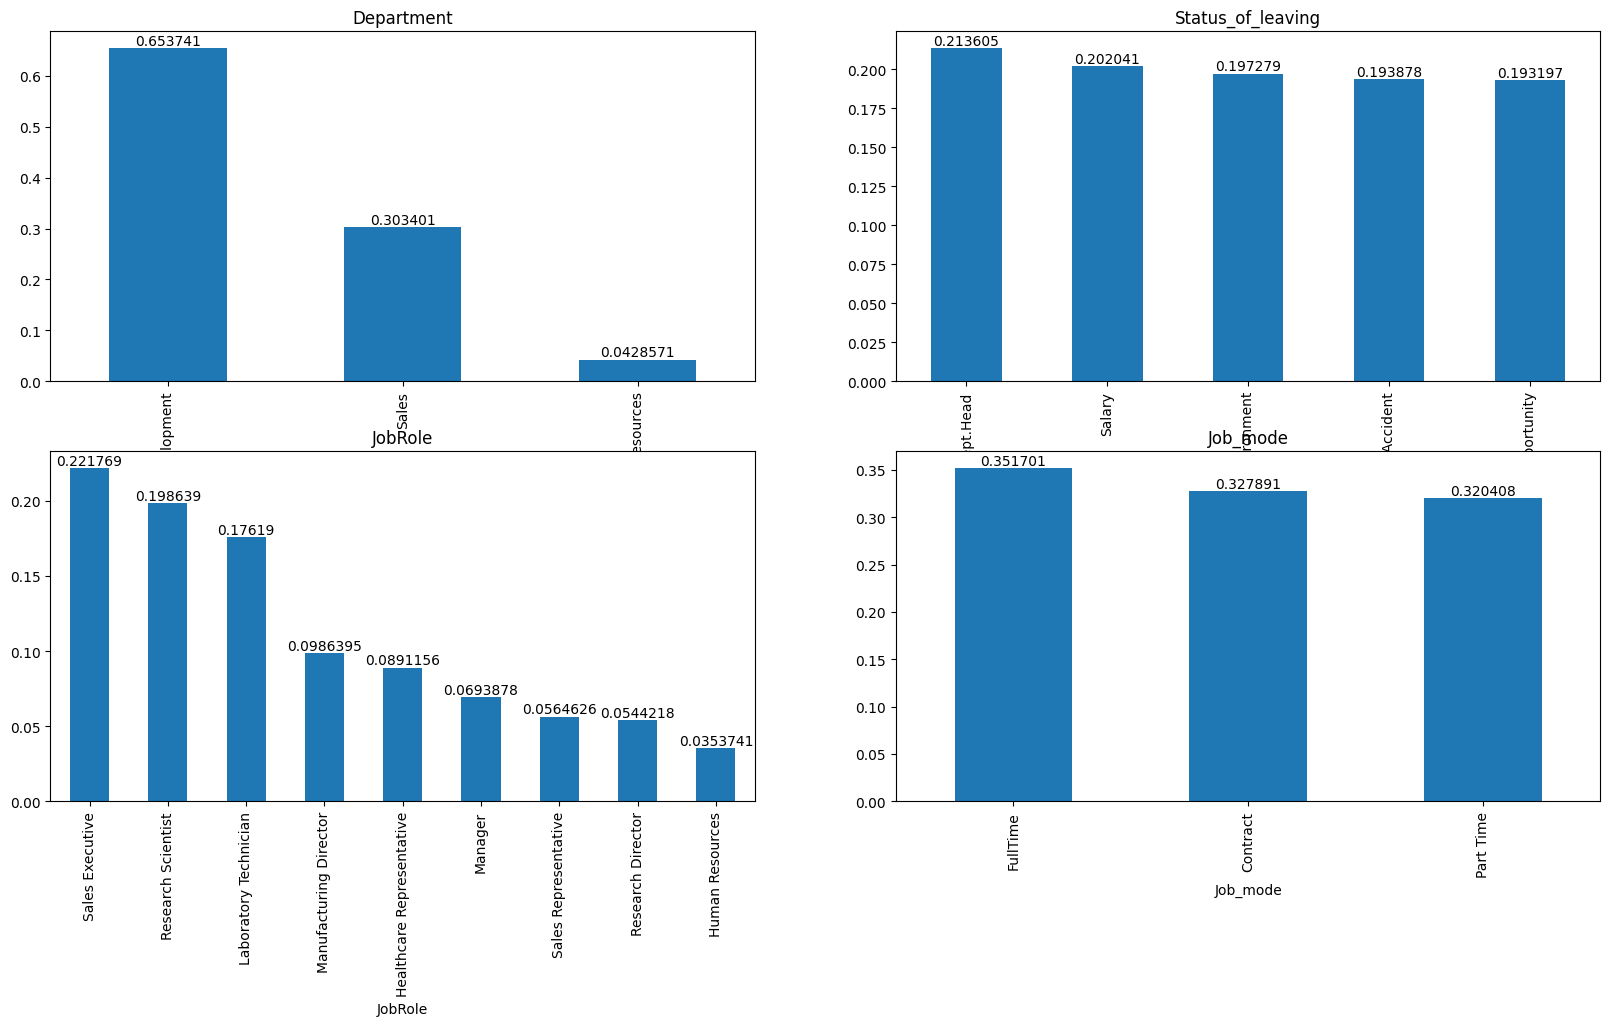

In [16]:
plt.figure(1)
plt.subplot(221)
dept=attrition["Department"].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'Department')
for i in dept.containers:
    dept.bar_label(i)

plt.subplot(222)
status=attrition["Status_of_leaving"].value_counts(normalize=True).plot.bar(title= 'Status_of_leaving')
for i in status.containers:
    status.bar_label(i)

plt.subplot(223)
role=attrition["JobRole"].value_counts(normalize=True).plot.bar(title= 'JobRole')
for i in role.containers:
    role.bar_label(i)
    
plt.subplot(224)
Job_mode=attrition["Job_mode"].value_counts(normalize=True).plot.bar(title= 'Job_mode')
for i in Job_mode.containers:
    Job_mode.bar_label(i)
    

It can inferred from the above bar plot that:

 65% peoples are in Research & Development department.

 21% workers status of leaving in Dept.Head.

 22% workers jobrole as Sales Exicutive.

 35% workers are full timer.


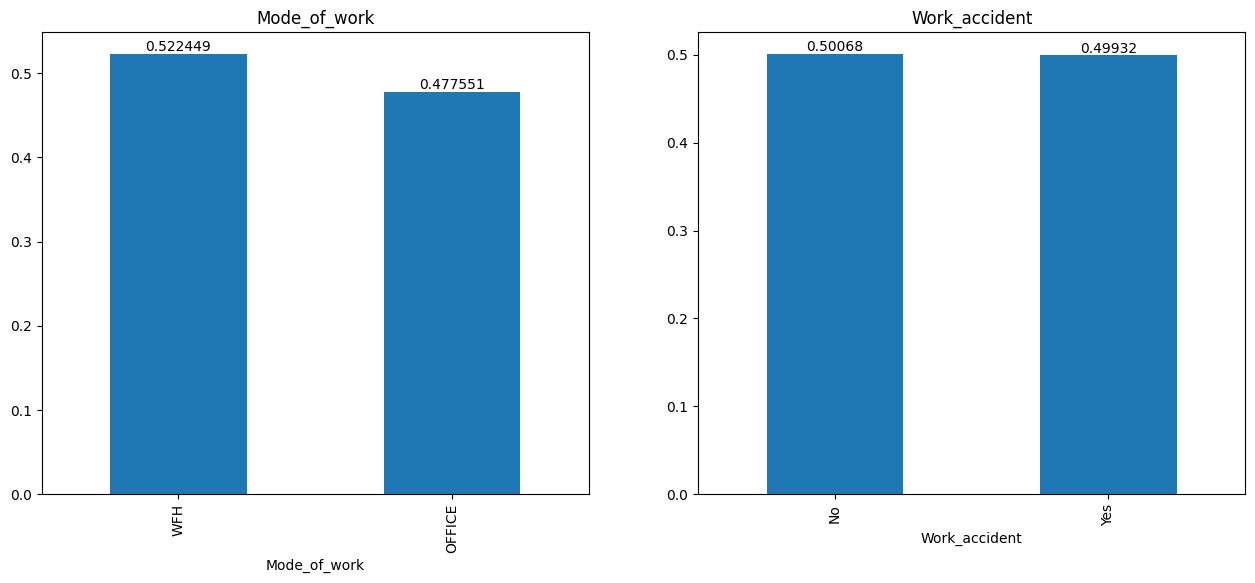

In [17]:
plt.figure(1)
plt.subplot(131)
Mode_of_work=attrition["Mode_of_work"].value_counts(normalize=True).plot.bar(figsize=(24,6),title= 'Mode_of_work')
for i in Mode_of_work.containers:
    Mode_of_work.bar_label(i)

plt.subplot(132)
Work_accident=attrition["Work_accident"].value_counts(normalize=True).plot.bar(title= 'Work_accident')
for i in Work_accident.containers:
    Work_accident.bar_label(i)

Following interference can mode from the above bar plots:

52% employee work mode is Work From Home.

51% employee work accident is no.

# **Independent Variable (Ordinal)**

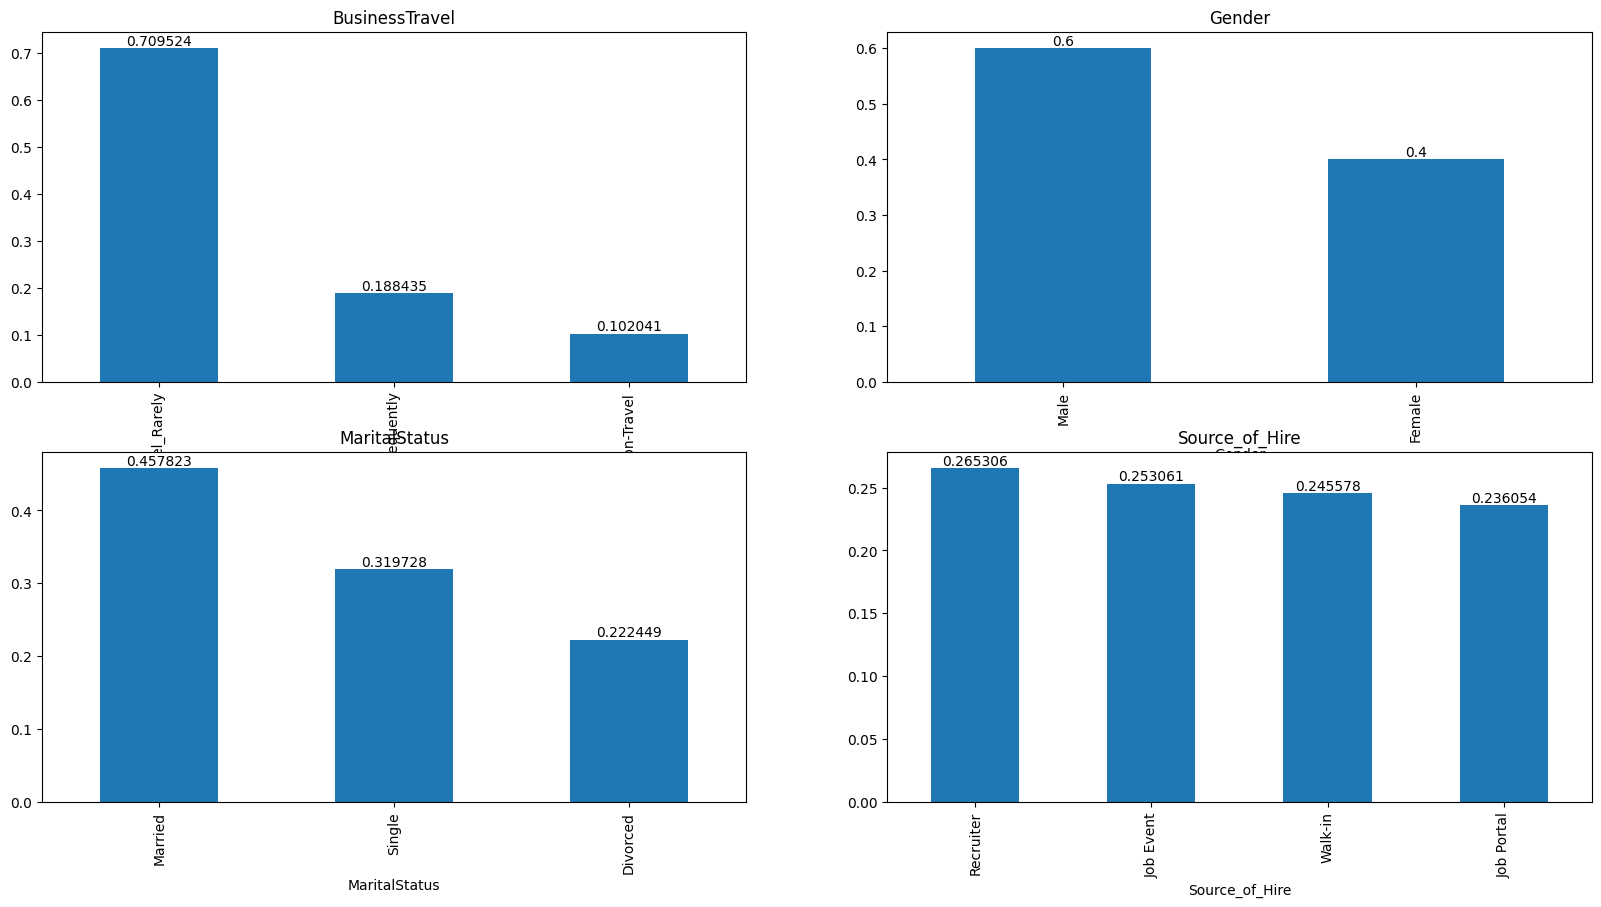

In [18]:
plt.figure(1)
plt.subplot(221)
BusinessTravel=attrition["BusinessTravel"].value_counts(normalize=True).plot.bar(figsize=(20,10),title= 'BusinessTravel')
for i in BusinessTravel.containers:
    BusinessTravel.bar_label(i)

plt.subplot(222)
Gender=attrition["Gender"].value_counts(normalize=True).plot.bar(title= 'Gender')
for i in Gender.containers:
    Gender.bar_label(i)

plt.subplot(223)
MaritalStatus=attrition["MaritalStatus"].value_counts(normalize=True).plot.bar(title= 'MaritalStatus')
for i in MaritalStatus.containers:
    MaritalStatus.bar_label(i)

plt.subplot(224)
Source_of_Hire=attrition["Source_of_Hire"].value_counts(normalize=True).plot.bar(title= 'Source_of_Hire')
for i in Source_of_Hire.containers:
    Source_of_Hire.bar_label(i)

Following interference can mode from the above bar plots:

70% employees are Travel_Rarely.

60% employees are Male.

45% employees are Unmarried.

26 % employee are Recruiter.


In [19]:
attrition["BusinessTravel"].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

# **Independent Variable (Numerical)**

In [20]:
# For finding numerical data
numerical=attrition.select_dtypes(include="int64")
numerical

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism
0,37,2,2,1,3,2090,6,15,3,0,7,3,0,0,0,4,2
1,21,15,3,1,4,1232,1,14,3,0,0,6,0,0,0,5,2
2,45,6,3,3,1,13245,4,14,3,0,17,3,0,0,0,1,3
3,23,2,3,1,1,2322,3,13,3,1,3,3,0,0,0,1,0
4,22,15,3,1,4,2871,1,15,3,0,1,5,0,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,3,2,4,1,16856,1,11,3,0,34,3,34,1,16,3,2
1466,55,1,3,5,1,19045,0,14,3,0,37,2,36,4,13,1,1
1467,55,26,2,5,4,19586,1,21,4,1,36,3,36,2,13,2,1
1468,58,10,3,4,3,13872,0,13,3,0,38,1,37,1,8,2,2


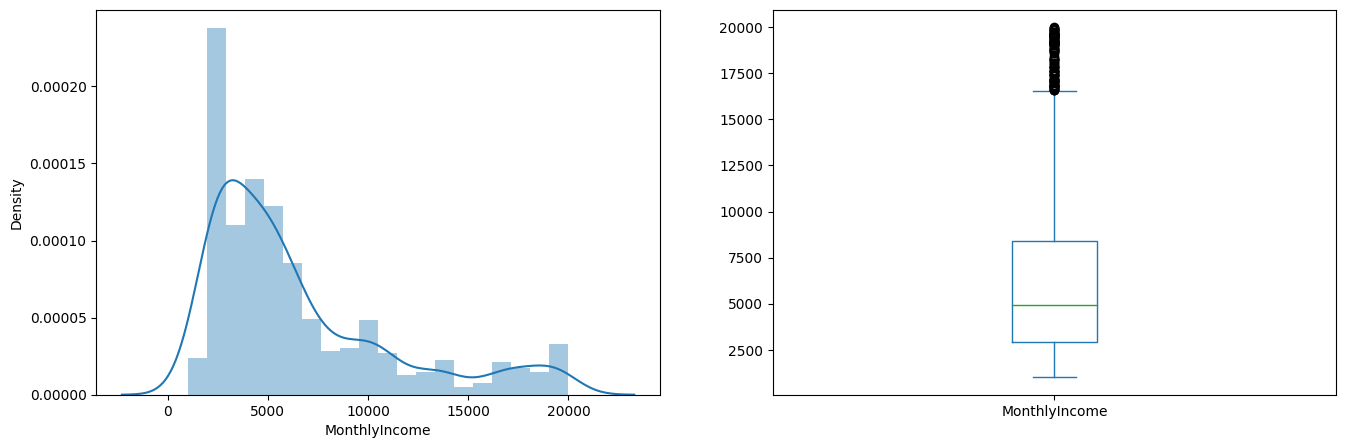

In [21]:
plt.figure(1)
plt.subplot(121)
sns.distplot(attrition["MonthlyIncome"])

plt.subplot(122)
attrition["MonthlyIncome"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

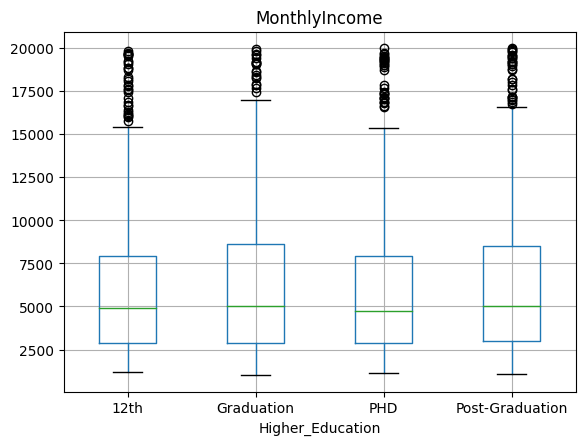

In [22]:
attrition.boxplot(column="MonthlyIncome",by="Higher_Education")
plt.suptitle("")

There are a higher number of income with very high income.

# **Categorical Independent Variable v/s Target Variable**

In [23]:
gender=pd.crosstab(attrition["Gender"],attrition["Attrition"])
gender

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


<Axes: xlabel='Gender'>

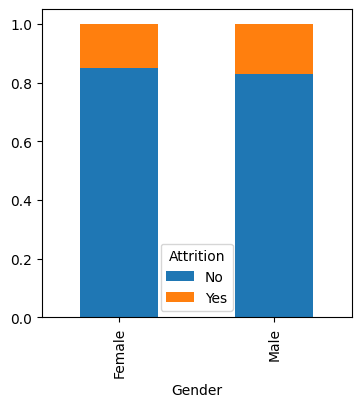

In [24]:
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

In proportional attrition high in Male. 

<Axes: xlabel='Work_accident'>

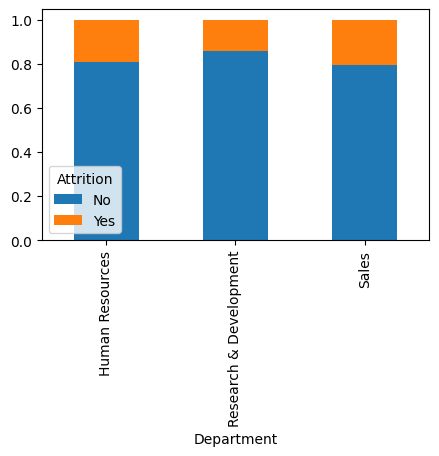

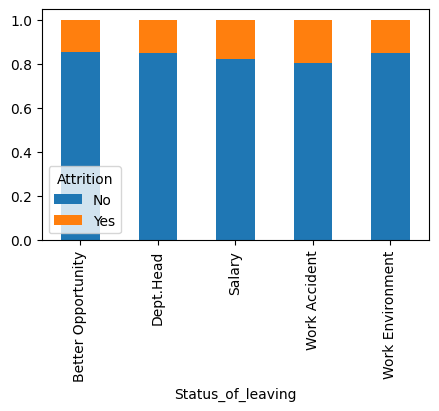

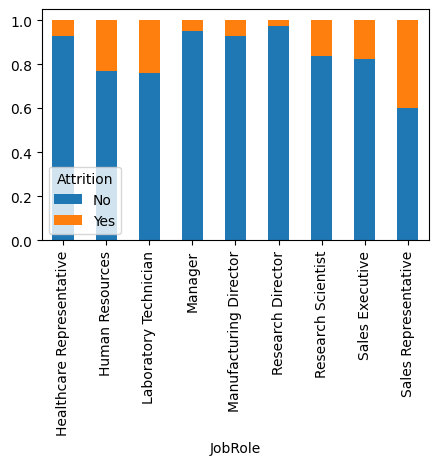

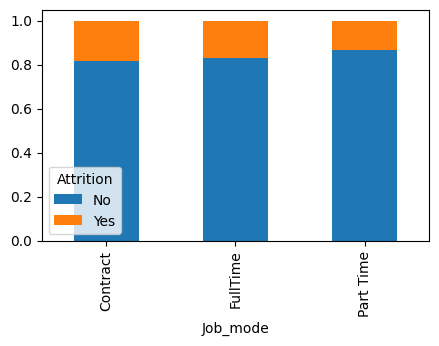

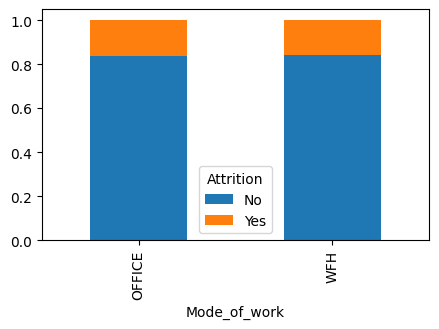

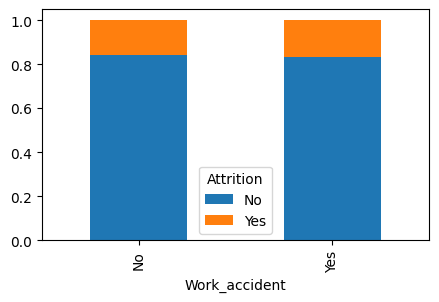

In [25]:
Department=pd.crosstab(attrition["Department"],attrition["Attrition"])
Status_of_leaving=pd.crosstab(attrition["Status_of_leaving"],attrition["Attrition"])
jobRole=pd.crosstab(attrition["JobRole"],attrition["Attrition"])
Job_mode=pd.crosstab(attrition["Job_mode"],attrition["Attrition"])
Mode_of_work=pd.crosstab(attrition["Mode_of_work"],attrition["Attrition"])
Work_accident=pd.crosstab(attrition["Work_accident"],attrition["Attrition"])


Department.div(Department.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,3))
Status_of_leaving.div(Status_of_leaving.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,3))
jobRole.div(jobRole.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,3))
Job_mode.div(Job_mode.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,3))
Mode_of_work.div(Mode_of_work.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,3))
Work_accident.div(Work_accident.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,3))


Proportion of Attrition is higher Sales department.

In status_of_leaving work_accident is higher employee way to attrition.

In proportion of Attrition Job Role as Sales Representative is high.

Proportion of Attrition job mode is in Office is greater than work from home.

work accident is yes way of attrition.




Now we look in the relation between remaining categorical independent variables and attrition.

<Axes: xlabel='Source_of_Hire'>

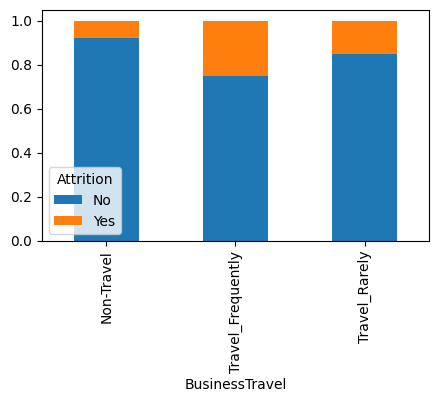

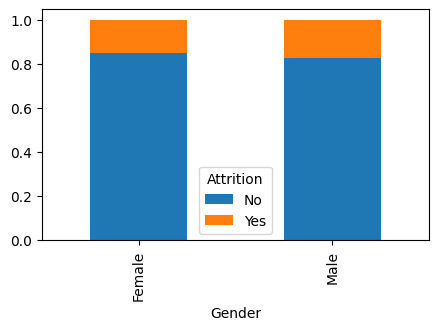

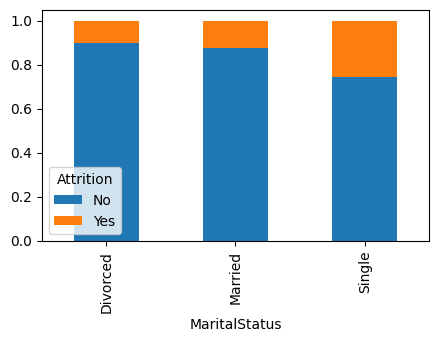

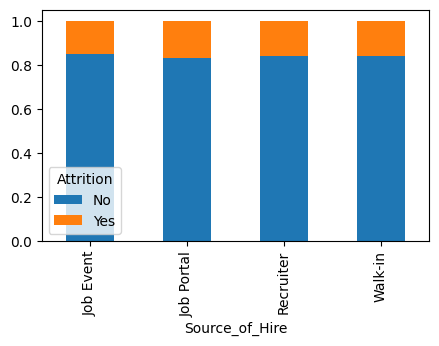

In [26]:
BusinessTravel=pd.crosstab(attrition["BusinessTravel"],attrition["Attrition"])
Gender = pd.crosstab(attrition["Gender"],attrition["Attrition"])
MaritalStatus=pd.crosstab(attrition["MaritalStatus"],attrition["Attrition"])
Source_of_Hire= pd.crosstab(attrition["Source_of_Hire"],attrition["Attrition"])

BusinessTravel.div(BusinessTravel.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,3))
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,3))
MaritalStatus.div(MaritalStatus.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,3))
Source_of_Hire.div(Source_of_Hire.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,3))

This probability is through above graphical representation:

In BussinessTravel of attrition of Travel_Frequently is greater then others.

Possibility of high is in Male Emplyoee.

proportion of attrition is high in Unmarried(Single) Employee.

Recruite through online job portal is greater possibility to attrition.

# **Numerical Independent Variable vs Target Variable**

<Axes: xlabel='Attrition'>

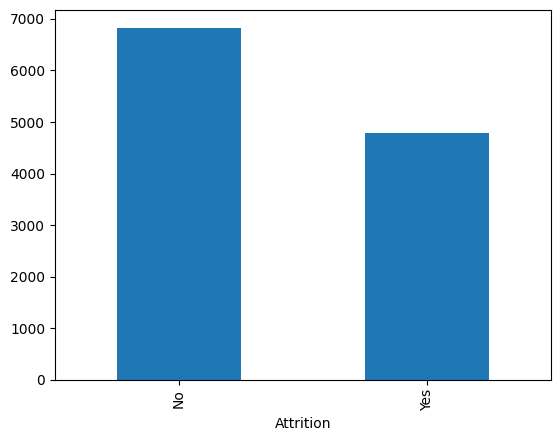

In [27]:
attrition.groupby("Attrition")["MonthlyIncome"].mean().plot.bar()

Here the y-axis represents the mean of employee monthly income.In this graphical representation shows attrition for highly income.

In [28]:
attrition["MonthlyIncome"].sort_values(ascending=False)

1460    19999
1411    19973
690     19943
601     19926
652     19859
        ...  
206      1091
203      1081
140      1052
22       1051
108      1009
Name: MonthlyIncome, Length: 1470, dtype: int64

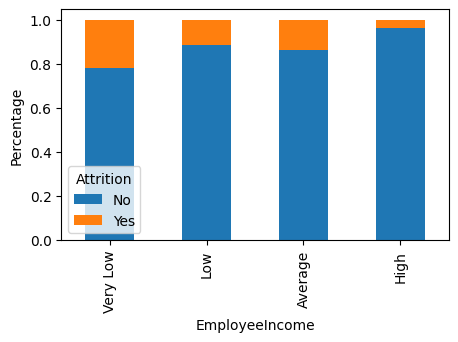

In [29]:
bins=[0,5000,10000,15000,20000] 
group=['Very Low','Low','Average', 'High'] 
attrition["Income_bin"]=pd.cut(attrition["MonthlyIncome"], bins = bins, labels = group)

Income_bin=pd.crosstab(attrition["Income_bin"],attrition["Attrition"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,3))
plt.xlabel("EmployeeIncome")
p=plt.ylabel("Percentage")

It can be seen that the proportion of attrition higher is very low employee Income.

<Axes: >

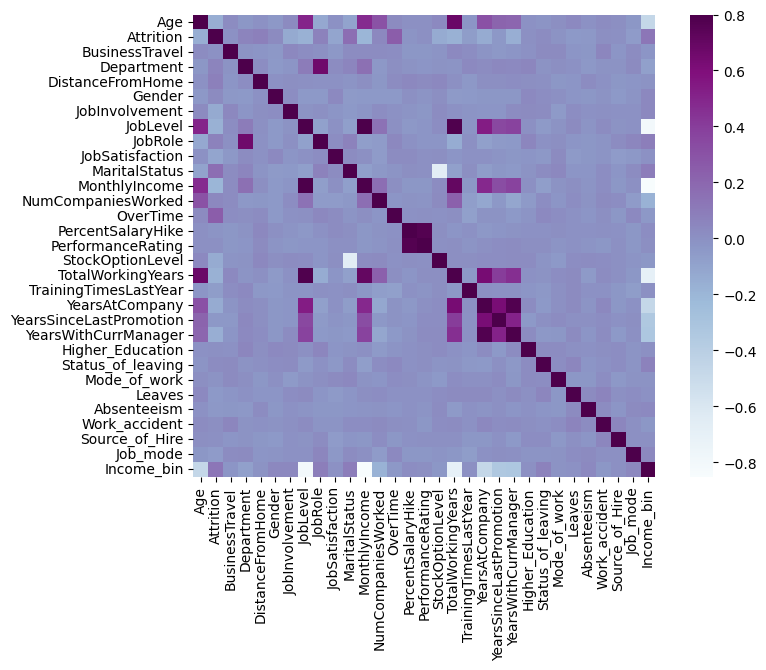

In [30]:
for i in attrition.columns:
    
    attrition[[i]]=attrition[[i]].apply(LabelEncoder().fit_transform)

matrix = attrition.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.



# **Missing Value Imputations**

Counting missing values in this dataset.

In [31]:
attrition.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Higher_Education           0
Status_of_leaving          0
Mode_of_work               0
Leaves                     0
Absenteeism                0
Work_accident              0
Source_of_Hire             0
Job_mode                   0
Income_bin                 0
dtype: int64

No null values available in this dataset.

# **Evaluation Metrix**

The process of model building is not complete without evalution of model performance.

**Accuracy:**
Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. 

In [32]:
x=attrition.drop(["Attrition"],axis=1)
y=attrition["Attrition"]


In [33]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size = 0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [34]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [35]:
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8616780045351474

Let’s make predictions for the test dataset.

In [36]:
pred =model.predict(x)
accuracy_score(y,pred)

0.8625850340136054

In [37]:
i=1

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold".format (i,kf.n_splits))
    
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl =  y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print("accuracy_score",score)
    i+=1


1 of kfold
accuracy_score 0.8469387755102041

2 of kfold
accuracy_score 0.8469387755102041

3 of kfold
accuracy_score 0.8571428571428571

4 of kfold
accuracy_score 0.8401360544217688

5 of kfold
accuracy_score 0.8843537414965986


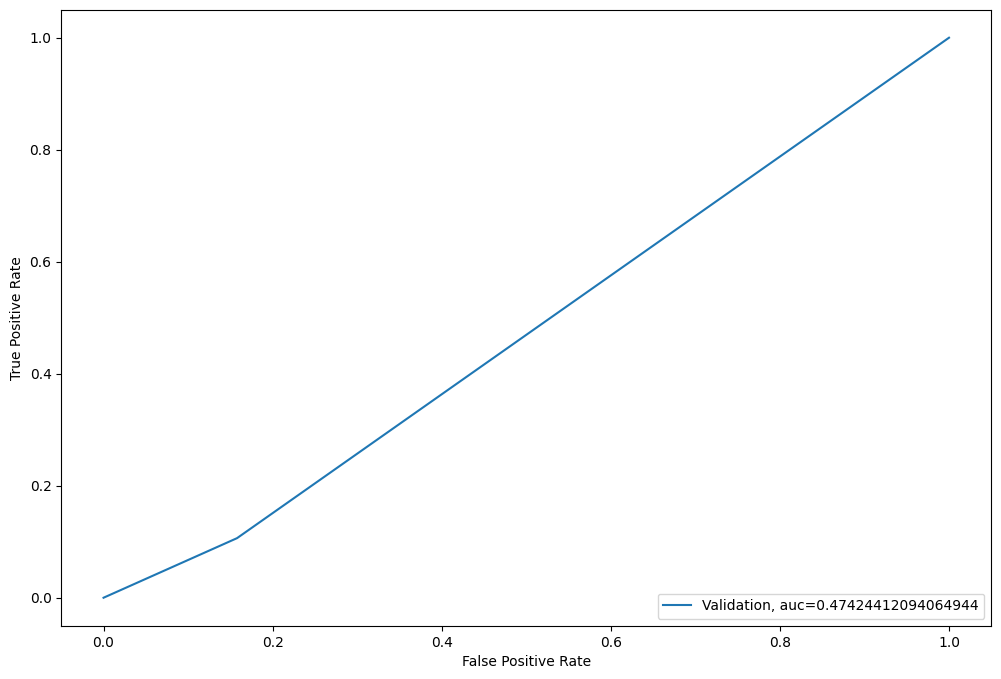

In [38]:
fpr, tpr, _ = metrics.roc_curve(yvl[:294],pred[:294])
auc = metrics.roc_auc_score(yvl[:294],pred[:294])

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation, auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

In [39]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education',
       'Status_of_leaving', 'Mode_of_work', 'Leaves', 'Absenteeism',
       'Work_accident', 'Source_of_Hire', 'Job_mode', 'Income_bin'],
      dtype='object')

Let’s check the distribution of Montly Income.

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

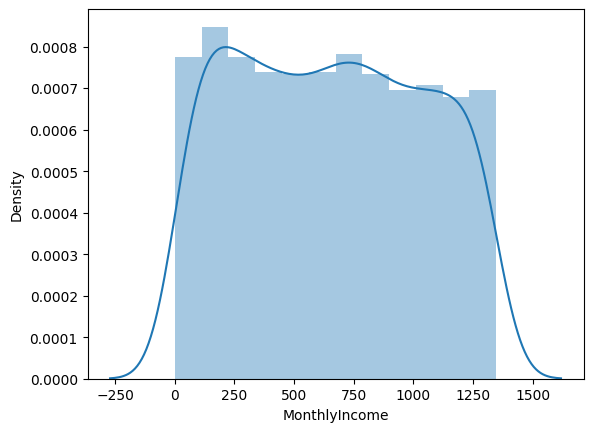

In [40]:
sns.distplot(attrition["MonthlyIncome"])

In [41]:
x=attrition.drop(["Attrition"],axis=1)
y=attrition["Attrition"]

# **Logistic Regression**

In [42]:
i=1

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xvl)
    LRscore = accuracy_score(yvl,pred_test)
    print("LogisticRegression accuracy_score",LRscore)
    i+=1


1 of kfold 5
LogisticRegression accuracy_score 0.8469387755102041

2 of kfold 5
LogisticRegression accuracy_score 0.8469387755102041

3 of kfold 5
LogisticRegression accuracy_score 0.8571428571428571

4 of kfold 5
LogisticRegression accuracy_score 0.8401360544217688

5 of kfold 5
LogisticRegression accuracy_score 0.8843537414965986


# **Decision Tree Classifier**

In [43]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xvl)
    DTscore = accuracy_score(yvl,pred_test)
    print("DecisionTreeClassifier accuracy_score",DTscore)
    i+=1


1 of kfold 5
DecisionTreeClassifier accuracy_score 0.7789115646258503

2 of kfold 5
DecisionTreeClassifier accuracy_score 0.7891156462585034

3 of kfold 5
DecisionTreeClassifier accuracy_score 0.7959183673469388

4 of kfold 5
DecisionTreeClassifier accuracy_score 0.7857142857142857

5 of kfold 5
DecisionTreeClassifier accuracy_score 0.8197278911564626


# **Random Forest Classifier**

In [44]:
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xvl)
    RFscore = accuracy_score(yvl,pred_test)
    print("RandomForestClassifier accuracy_score",RFscore)
    i+=1
    


1 of kfold 5
RandomForestClassifier accuracy_score 0.8571428571428571

2 of kfold 5
RandomForestClassifier accuracy_score 0.8605442176870748

3 of kfold 5
RandomForestClassifier accuracy_score 0.8469387755102041

4 of kfold 5
RandomForestClassifier accuracy_score 0.8537414965986394

5 of kfold 5
RandomForestClassifier accuracy_score 0.8639455782312925


We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators

In [45]:
paramgrid = {"max_depth" : list(range(1,20,2)),"n_estimators" : list(range(1,200,20))}

In [46]:
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1),paramgrid)

In [47]:
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [48]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [49]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=181, random_state=1)

So, the optimized value for the max_depth variable is 9 and for n_estimator is 181. Now let’s build the model using these optimized values.

In [50]:
i = 1
kf = StratifiedKFold(n_splits = 9,random_state = 1,shuffle = True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state = 1 ,max_depth = 5,n_estimators=181)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xvl)
    RFscore = accuracy_score(yvl,pred_test)
    print("RandomForestClassifier accuracy_score",RFscore)
    i+=1


1 of kfold 9
RandomForestClassifier accuracy_score 0.8414634146341463

2 of kfold 9
RandomForestClassifier accuracy_score 0.8658536585365854

3 of kfold 9
RandomForestClassifier accuracy_score 0.8353658536585366

4 of kfold 9
RandomForestClassifier accuracy_score 0.8650306748466258

5 of kfold 9
RandomForestClassifier accuracy_score 0.8588957055214724

6 of kfold 9
RandomForestClassifier accuracy_score 0.8343558282208589

7 of kfold 9
RandomForestClassifier accuracy_score 0.852760736196319

8 of kfold 9
RandomForestClassifier accuracy_score 0.8466257668711656

9 of kfold 9
RandomForestClassifier accuracy_score 0.852760736196319


In [51]:
i = 1
kf = StratifiedKFold(n_splits = 9,random_state = 1,shuffle = True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xvl)
    KNNscore = accuracy_score(yvl,pred_test)
    print("KNeighbors Classifier accuracy_score",KNNscore)
    i+=1


1 of kfold 9
KNeighbors Classifier accuracy_score 0.8353658536585366

2 of kfold 9
KNeighbors Classifier accuracy_score 0.8353658536585366

3 of kfold 9
KNeighbors Classifier accuracy_score 0.8353658536585366

4 of kfold 9
KNeighbors Classifier accuracy_score 0.8404907975460123

5 of kfold 9
KNeighbors Classifier accuracy_score 0.8404907975460123

6 of kfold 9
KNeighbors Classifier accuracy_score 0.8466257668711656

7 of kfold 9
KNeighbors Classifier accuracy_score 0.852760736196319

8 of kfold 9
KNeighbors Classifier accuracy_score 0.8404907975460123

9 of kfold 9
KNeighbors Classifier accuracy_score 0.8404907975460123


# **Support Vector Classifier**

In [52]:
i = 1
kf = StratifiedKFold(n_splits = 9,random_state = 1,shuffle = True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = SVC(random_state = 100)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xvl)
    SVscore = accuracy_score(yvl,pred_test)
    print("Support Vector Classifier accuracy_score",SVscore)
    i+=1


1 of kfold 9
Support Vector Classifier accuracy_score 0.8353658536585366

2 of kfold 9
Support Vector Classifier accuracy_score 0.8353658536585366

3 of kfold 9
Support Vector Classifier accuracy_score 0.8353658536585366

4 of kfold 9
Support Vector Classifier accuracy_score 0.8404907975460123

5 of kfold 9
Support Vector Classifier accuracy_score 0.8404907975460123

6 of kfold 9
Support Vector Classifier accuracy_score 0.8404907975460123

7 of kfold 9
Support Vector Classifier accuracy_score 0.8404907975460123

8 of kfold 9
Support Vector Classifier accuracy_score 0.8404907975460123

9 of kfold 9
Support Vector Classifier accuracy_score 0.8404907975460123


# **Naive Bayes Classifier**

In [53]:
i = 1
kf = StratifiedKFold(n_splits = 9,random_state = 1,shuffle = True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = GaussianNB()
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xvl)
    NBscore = accuracy_score(yvl,pred_test)
    print("Naive Bayes Classifier accuracy_score",NBscore)
    i+=1


1 of kfold 9
Naive Bayes Classifier accuracy_score 0.7804878048780488

2 of kfold 9
Naive Bayes Classifier accuracy_score 0.8109756097560976

3 of kfold 9
Naive Bayes Classifier accuracy_score 0.7134146341463414

4 of kfold 9
Naive Bayes Classifier accuracy_score 0.7852760736196319

5 of kfold 9
Naive Bayes Classifier accuracy_score 0.8343558282208589

6 of kfold 9
Naive Bayes Classifier accuracy_score 0.7361963190184049

7 of kfold 9
Naive Bayes Classifier accuracy_score 0.8466257668711656

8 of kfold 9
Naive Bayes Classifier accuracy_score 0.803680981595092

9 of kfold 9
Naive Bayes Classifier accuracy_score 0.7607361963190185


# **XGBOOST**

XGBoost is a fast and efficient algorithm and has been used to by the winners of many data science competitions.

XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables.

n_estimator: This specifies the number of trees for the model.

max_depth: We can specify maximum depth of a tree using this parameter.

In [58]:
kf = StratifiedKFold(n_splits = 5,random_state = 1,shuffle = True)
for train_index,test_index in kf.split(x,y):
    print("\n{} of kfold {}".format(i,kf.n_splits))
    
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(n_estimators = 5,max_depth = 42)
    model.fit(xtr,ytr)
    
    pred_test = model.predict(xvl)
    XGBscore = accuracy_score(yvl,pred_test)
    print("XGBClassifier accuracy_score",XGBscore)
    i+=1


10 of kfold 5
XGBClassifier accuracy_score 0.8401360544217688

11 of kfold 5
XGBClassifier accuracy_score 0.8401360544217688

12 of kfold 5
XGBClassifier accuracy_score 0.8503401360544217

13 of kfold 5
XGBClassifier accuracy_score 0.8469387755102041

14 of kfold 5
XGBClassifier accuracy_score 0.8571428571428571


# **Comparing the models and checking the best accuracy result off the lot**

In [59]:
print("LRscore",LRscore)
print("RFscore",RFscore)
print("KNNscore",KNNscore)
print("SVscore",SVscore)
print("NBscore",NBscore)
print("DTscore",DTscore)
print("XGBscore",XGBscore)

LRscore 0.8843537414965986
RFscore 0.852760736196319
KNNscore 0.8404907975460123
SVscore 0.8404907975460123
NBscore 0.7607361963190185
DTscore 0.8197278911564626
XGBscore 0.8571428571428571


In [60]:
models = pd.DataFrame({'Model': ['Logistic', 'KNN', 'SVC', 'Decision Tree',
                       'Random Forest', 'GaussianNB','XGB'],
                       'Accuracy': [ LRscore,KNNscore, SVscore, DTscore, RFscore, NBscore,XGBscore]})

models.sort_values(by = 'Accuracy', ascending = False) 

,Model,Accuracy
0,Logistic,0.884354
6,XGB,0.857143
4,Random Forest,0.852761
1,KNN,0.840491
2,SVC,0.840491
3,Decision Tree,0.819728
5,GaussianNB,0.760736


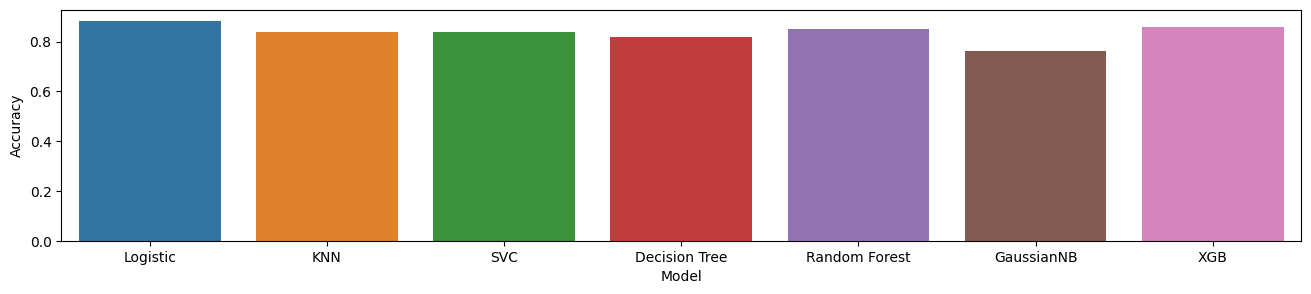

In [61]:
plt.figure(figsize = (16,3))
sns.barplot(x = 'Model', y = 'Accuracy', data = models)
plt.show()

**We notice here that Logistic Regression is giving us the best accuracy result so ,we will go with the Logistic Regression model.**